In [3]:
from IPython.display import display, HTML 
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

<b><font size="5" color="red">ch10. N차원 배열 다루기 </font><b>
- [numpy](https://numpy.org/doc/stable/)
- [numpy_API](https://numpy.org/doc/stable/reference/index.html)
- N차원 배열 객체
- 2차원 배열은 행렬개념
- numpy 패키지는 c언어로 구현되어 고성능 수치 계산 패키지
# 1절. 넘파이 패키지

In [7]:
import numpy as np
np.__version__

'1.23.5'

In [6]:
# np.arrange(from, stop, step) : from부터 step앞까지 step씩 증감한 정수값을 배열로 생성
a = np.arange(15)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## 1.1 배열 속성

In [6]:
from numpy import arange
a = arange(15).reshape(3,5) # 3행 5열짜리 2차원 배열로 return
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [8]:
type(a) # a 변수의 타입

numpy.ndarray

In [17]:
a.dtype.name # a 배열 요소의 타입

'int32'

In [11]:
2**7, 2**15, 2**31, 2**63

(128, 32768, 2147483648, 9223372036854775808)

In [12]:
a.itemsize # 한 요소의 bytesize

4

In [13]:
a.ndim # 차원수(축수)

2

In [18]:
a.size # 배열 요소의 갯수

15

In [19]:
a.shape # 배열의 구조 (튜플)

(3, 5)

## 1.2 배열 변경 (구조, 타입)

In [20]:
# 구조 변경
print('구조변경 전', a, sep='\n')
a.shape = (5,3)
print('구조변경 후', a, sep='\n')

구조변경 전
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
구조변경 후
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


In [4]:
# 타입 변경 (x)
a = arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [5]:
a.dtype

dtype('int32')

In [6]:
a.itemsize

4

In [10]:
a.dtype = np.int64 # a배열을 읽을 때 64bit씩 읽는다
a.dtype

dtype('int64')

In [ ]:
a.itemsize

In [11]:
a.size, a.shape

(6, (3, 2))

In [12]:
a

array([[ 4294967296, 12884901890],
       [21474836484, 30064771078],
       [38654705672, 47244640266]], dtype=int64)

In [13]:
# 타입 변경 (o)
a = arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [16]:
a = a.astype(np.int64) # a.astype('int64')
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [17]:
a.dtype, a.itemsize, a.size, a.shape

(dtype('int64'), 8, 12, (3, 4))

In [18]:
a.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [19]:
a.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

## 1.3 배열 저장

In [20]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [22]:
import pickle
with open('data/ch10_a.pkl', 'wb') as f:
    pickle.dump(a, f)

In [29]:
with open('data/ch10_a.pkl', 'rb') as f:
    load_a = pickle.load(f)
load_a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [25]:
np.all(a == load_a) # a 넘파이 배열과 load_a 넘파이 배열이 같은이 체크

True

In [26]:
np.save('data/ch10_a.npy', a) # 데이터 파일이 클 때 사용

In [28]:
load_a2 = np.load('data/ch10_a.npy')

In [30]:
np.all(load_a2==a)

True

# 2절. 넘패이 배열
- array()함수를 이용한 다른 파이썬 데이터 구조를 배열로 변환
- arrange(), ones(), zeros(), empty()
- 랜덤값은 갖는 함수들...
## 2.1 array()함수로 넘파이 배열 만들기
- array(리스트나 튜플, dtype=np.xxx, copy=T/F)

In [33]:
# 정수의 기본 타입은 int32 / 실수의 기본 타입은 float64, 배열 안에는 스칼라(숫자, 문자, 논리)
a = np.array([2,4,6], dtype=np.int8) 
a

array([2, 4, 6], dtype=int8)

In [34]:
a[0],a[1],a[2]

(2, 4, 6)

In [36]:
a.dtype

dtype('int8')

In [40]:
b = np.array([[1.3,2.4],
          [4,5]])
b

array([[1.3, 2.4],
       [4. , 5. ]])

In [42]:
b.dtype

dtype('float64')

In [45]:
b = np.array([[1.3,2.4],[4,5]], dtype=np.float32).reshape(1,4)
b

array([[1.3, 2.4, 4. , 5. ]], dtype=float32)

In [46]:
b.itemsize, b.astype(np.float64)

(4, array([[1.29999995, 2.4000001 , 4.        , 5.        ]]))

In [47]:
l = [[1,2], [3.4,4.5]]
for row in l:
    for data in row:
        print(data, end='\t')
    print()

1	2	
3.4	4.5	


In [49]:
c = np.array([[1,2], [3.4,4.5]], dtype=np.float16)
for i, row in enumerate(c):
    for j, item in enumerate(row):
        print('{}행{}열:{}'.format(i,j,item),end='\t')
    print()

0행0열:1.0	0행1열:2.0	
1행0열:3.400390625	1행1열:4.5	


In [51]:
c = np.array([[1,2,3,4,5],[6,7,8,9,10]], dtype=np.int16)
c

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]], dtype=int16)

In [58]:
c[0,3], c[:,1:3], c[0,2:] # indexing은 초과 불가, slicing은 유연

(4,
 array([[2, 3],
        [7, 8]], dtype=int16),
 array([3, 4, 5], dtype=int16))

In [59]:
# 모든행의 맨 마지막 열만 추출
c[:,-1]

array([ 5, 10], dtype=int16)

In [60]:
# 모든행의 맨 마지막 열을 제외한 추출
c[:,:-1]

array([[1, 2, 3, 4],
       [6, 7, 8, 9]], dtype=int16)

In [63]:
c = np.array([[1,2],[3,4]])
d = np.array(c, copy=False) # d = c (False일때, d의 주소에 c의 주소를 할당)
print('c=', c, sep='\n')
print('d=', d, sep='\n')
d[1,0] = 3333
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print('c주소={}, d주소={}'.format(id(c), id(d)))

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
c=
[[   1    2]
 [3333    4]]
d=
[[   1    2]
 [3333    4]]
c주소=2166508515568, d주소=2166508515568


In [64]:
c = np.array([[1,2],[3,4]])
d = np.array(c, copy=True) # d = c.copy() (True 일때, d의 array에 c의 요소 값을 할당)
print('c=', c, sep='\n')
print('d=', d, sep='\n')
d[1,0] = 3333
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print('c주소={}, d주소={}'.format(id(c), id(d)))

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
c=
[[1 2]
 [3 4]]
d=
[[   1    2]
 [3333    4]]
c주소=2166508516720, d주소=2166508515760


## 2.2 기본값이 있는 배열 만들기
- np.zeros( tup ) : 요소들이 다 0
- np.ones( tup ) : 요소들이 다 1
- np.full( tup, 기본값) : 요소들이 다 기본값
- np.empty(tup) : 요소들이 임의의 값(메모리 상태에 따라 달라짐)
※ 위의 함수를 이용해서 생성된 배열은 기본 dtype이 float64, dtype속성 따라 지정 가능

In [65]:
np.zeros( (3,5), dtype=np.int8)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=int8)

In [67]:
x = np.ones( (3,5))
x.dtype, x

(dtype('float64'),
 array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]))

In [71]:
np.full( (2,5), -256)

array([[-256, -256, -256, -256, -256],
       [-256, -256, -256, -256, -256]])

In [73]:
np.empty( (2,5), dtype=np.float16)

array([[4.2e-07, 0.0e+00, 1.9e-06, 0.0e+00, 7.2e-07],
       [0.0e+00, 1.9e-06, 0.0e+00, 4.2e-07, 0.0e+00]], dtype=float16)

## 2.3 랜덤값을 갖는 배열 만들기
- np.random.random(tup) : 0부터 1미만의 균등 분포, 0<= 난수 <1
- np.random.uniform(low=0, high=1.0, size=tup) : low부터 high미만의 균등분포를 갖는 랜덤값
- np.random.normal(loc=0, scale=1.0, size=tup) : 평균loc과 표준편차scale을 갖는 정규분포 랜덤값
- np.random.rand(n) : 균등분포의 1차원 난수 배열 발생 (난수 n개)
- np.random.randn(n) : 표준정규분포(평균0, 표준편차1인 정규분포)의 1차원 난수 배열 발생 (난수 n개)
- cf. np.random.randint(n) : 0qnxj n미만의 정수 난수 1개 발생

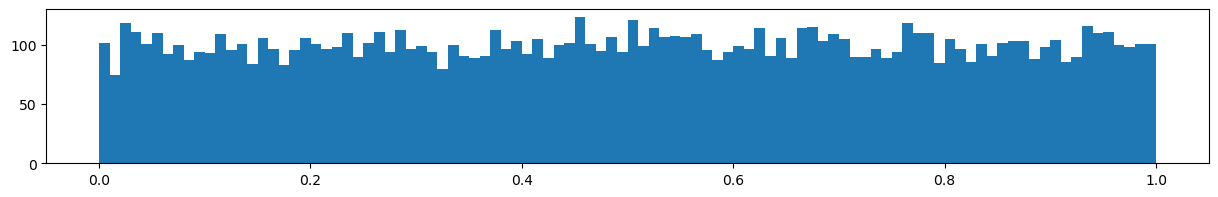

In [14]:
import matplotlib.pyplot as plt
x = np.random.rand(10000)
plt.figure(figsize=(15,2)) # 그래프 크기 figsize=(가로,세로)
plt.hist(x, bins=100)
plt.show()

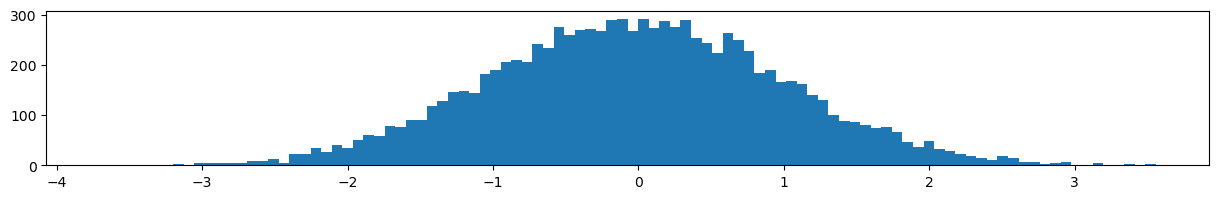

In [15]:
x = np.random.randn(10000)
plt.figure(figsize=(15,2)) # 그래프 크기 figsize=(가로,세로)
plt.hist(x, bins=100)
plt.show()

In [17]:
# 2차원 난수 배열
np.random.seed(12) # seed값을 맞추면 발생되는 난수 순서가 동일
np.random.random( (2,5)) # 0부터 1미만 균등분포 난수 배열

array([[0.15416284, 0.7400497 , 0.26331502, 0.53373939, 0.01457496],
       [0.91874701, 0.90071485, 0.03342143, 0.95694934, 0.13720932]])

In [19]:
np.random.uniform(-1, 10, (2,5)) # -1~10미만의 균등 분포 실수 난수 배열

array([[ 2.12211188,  5.66691503,  9.3864765 ,  8.38009095, -0.97514843],
       [ 4.7334863 ,  5.07241397,  4.33915155,  7.44947569,  0.76788428]])

In [21]:
np.random.normal(10, 2, (2, 5)) # 평균 10, 표준편차 2인 정규분포 난수 배열

array([[12.19191224,  7.5696624 , 12.68471274,  9.75570042, 12.02503095],
       [ 8.17226171,  7.94093959, 12.4195929 , 11.00374461, 10.27769235]])

## 2.4 연속된 값을 갖는 배열 만들기
- np.arange(from, stop, by, dtype) : from부터 stop까지 by씩 증감하는 정수 배열
- np.linspace(from, to, count) : from부터 to까지 (to포함) count개 숫자를 1차원 배열

In [22]:
np.linspace(0, 2, 20)

array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
       0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
       1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
       1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ])

In [23]:
# linspace : 많은 수의 점들을 생성
x = np.linspace(0, 2*np.pi, 1000)
y = np.sin(x)

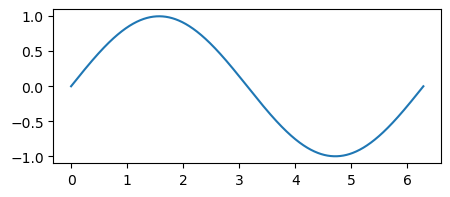

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,2))
plt.plot(x,y)
plt.show()

In [26]:
np.linspace(0, 2, 20).reshape(2, 10)

array([[0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
        0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842],
       [1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
        1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ]])

In [28]:
np.arange(10, 30, 3, dtype=np.int8)

array([10, 13, 16, 19, 22, 25, 28], dtype=int8)

## 2.5 배열의 차원 변경하기
- reshape([면수,] 행수, 열수) : -1이 올 수도
- resize([면수,] 행수, 열수) : -1 불가
- T : 전치행열로 변환
- transpose() : 전치행렬로 변환
※ 실행결과가 출력되면 배열이 수정되지 않고, 실행결과가 없으면 배열 수정됨

In [29]:
a = np.random.random( (2,3))
a

array([[0.76747565, 0.82500925, 0.4066403 ],
       [0.45130841, 0.40063163, 0.99513816]])

In [34]:
a = np.round(a * 10) # round : 반올림 / floor : 내림 / ceil : 올림

In [35]:
a = a.reshape(3,2)
a

array([[ 8.,  8.],
       [ 4.,  5.],
       [ 4., 10.]])

In [36]:
a.reshape(2, -1) # -1이 주어지면 해당 차원의 크기가 자동 계산

array([[ 8.,  8.,  4.],
       [ 5.,  4., 10.]])

In [37]:
a.reshape(-1, 1)

array([[ 8.],
       [ 8.],
       [ 4.],
       [ 5.],
       [ 4.],
       [10.]])

In [38]:
a.resize( (2,3)) # 결과를 출력하지 않는 함수는 배열을 바꿈, -1 활용 불가
a

array([[ 8.,  8.,  4.],
       [ 5.,  4., 10.]])

In [57]:
import seaborn as sns
sns.load_dataset('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
